In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("iriss.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Describe the datasets
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# View a random sample
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,4.9,2.5,4.5,1.7,Iris-virginica


In [18]:
X = df.drop(columns=['Species'])
X.shape

(150, 4)

In [19]:
y = df['Species']
y.shape

(150,)

In [20]:
#Divide the data into training data and testing data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(120, 4)

In [29]:
X_test.shape

(30, 4)

In [30]:
y_train.shape

(120,)

In [31]:
y_test.shape

(30,)

In [32]:
#Initialize the knn classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [33]:
# Call fit giving xtrain and y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
#Call the predict function giving X_test and y_test
y_predict = knn.predict(X_test)

In [39]:
def check_accuracy(y_predict, y_test):
    return (np.sum(y_predict == y_test)/len(y_test)) * 100

In [43]:
print(f"The accuracy is {check_accuracy(y_predict, y_test)}%")
print("Accuracy using sklearn = ", accuracy_score(y_test, y_predict))

The accuracy is 100.0%
Accuracy using sklearn =  1.0


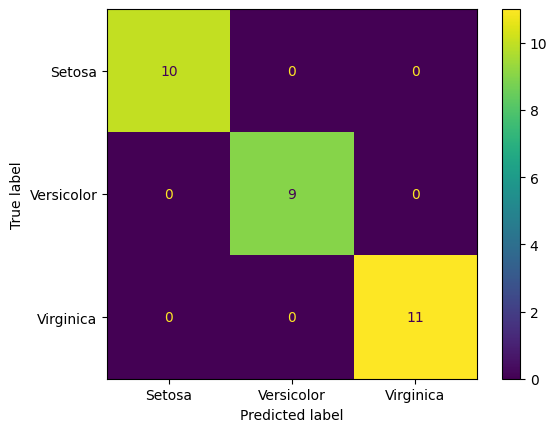

In [47]:
cm = confusion_matrix(y_test, y_predict)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa',"Versicolor","Virginica"])
cm_plot.plot()
plt.savefig("cm-knn.svg", format='SVG')

In [48]:
import pickle 

In [49]:
with open('model.pkl','wb') as file:
    pickle.dump(knn,file)